In [249]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import matplotlib.cm as cm
import glob 
import os
import matplotlib as mpl

In [242]:
# merging the files 
joined_files = os.path.join("../src/data/bets", "*.json") 
print(joined_files)
  
# # A list of all joined files is returned 
joined_list = glob.glob(joined_files) 
  
# # Finally, the files are joined 
df = pd.concat(map(pd.read_json, joined_list), ignore_index=True) 
print(df) 

../src/data/bets\*.json
                           id  \
0        rK73XJC40RoiBN4LGOKh   
1        0KRNPyZvDBlmke5wLAxx   
2        a3YBTDIQvEiVIbJOQKuV   
3        GZuEN83CsUEIrgTnv079   
4        WTZbkU4CaaPDiveJnjlu   
...                       ...   
4310594  I1VPe3to4fJDxGwijadh   
4310595  K7Ecc5Yhjh6tXrU1I6fA   
4310596  KhtdLW1pxfKR7lZyOkXu   
4310597  dS9KrRTh5SV8FNknXscD   
4310598  G8p2Td0gdR2TMBb5AXxa   

                                                      fees  \
0        {'creatorFee': 0, 'platformFee': 0, 'liquidity...   
1        {'creatorFee': 0, 'platformFee': 0, 'liquidity...   
2        {'creatorFee': 0, 'platformFee': 0, 'liquidity...   
3        {'creatorFee': 0, 'platformFee': 0, 'liquidity...   
4        {'creatorFee': 0, 'platformFee': 0, 'liquidity...   
...                                                    ...   
4310594                                                NaN   
4310595                                                NaN   
4310596              

In [243]:
#mapping
market_map = pd.read_csv("..\src\data\id_topic_mapping.csv")
d = dict(zip(market_map['id'], market_map['topic']))

In [244]:
# df = pd.read_json(r'../src/data/bets/000.2023-08-04.2023-08-02.json')
df['topics'] = df['contractId'].map(d)
df.dropna(inplace=True, subset = 'topics') #na's = markets with <50 bets

In [245]:
users, counts = np.unique(df['userId'], return_counts=True) #all unique users

In [246]:
high_users = users[counts > 100] #50? 100? 500?
len(high_users)

2322

In [252]:
ids = high_users[np.random.randint(0, len(high_users), 10)]  #consider 10 random high_users

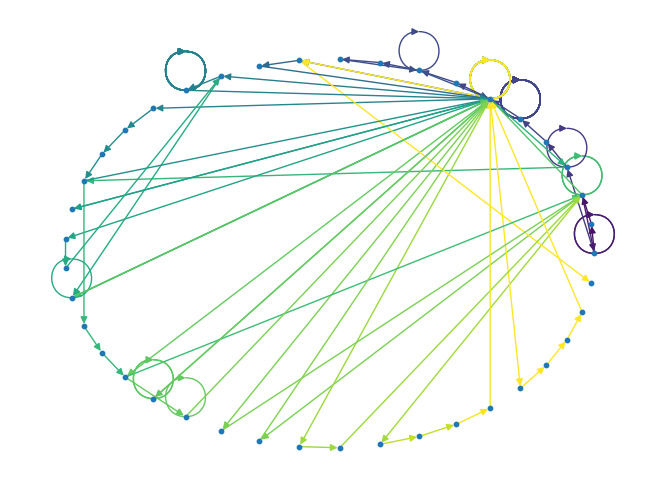

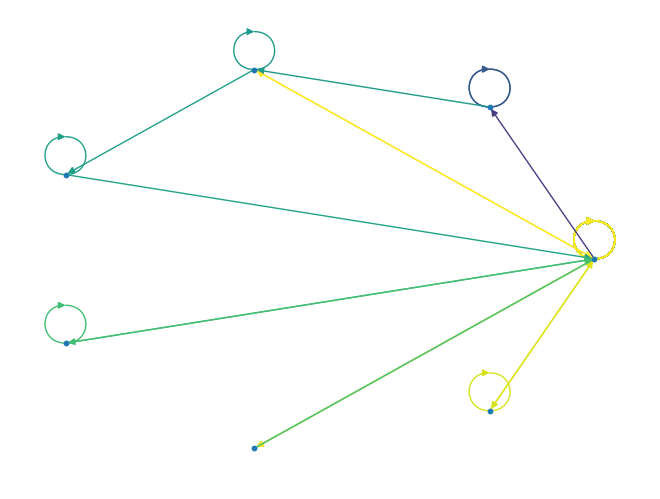

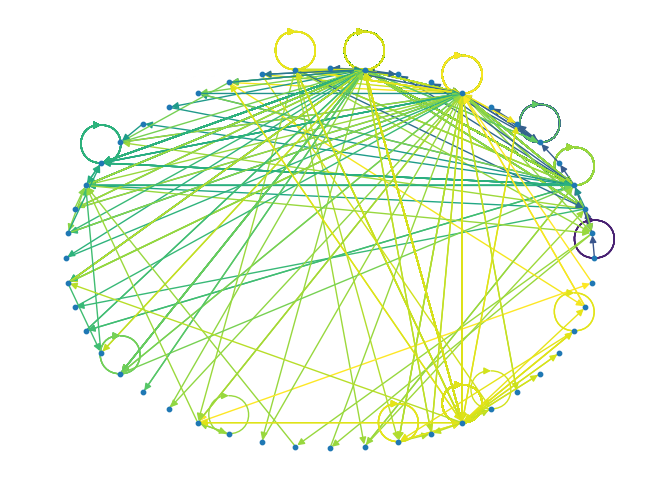

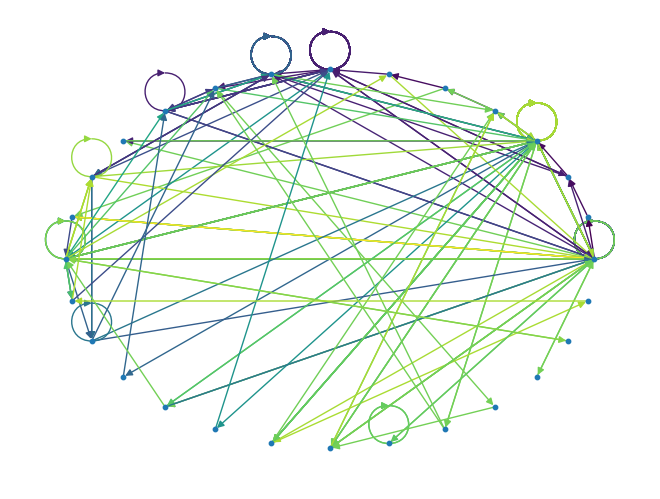

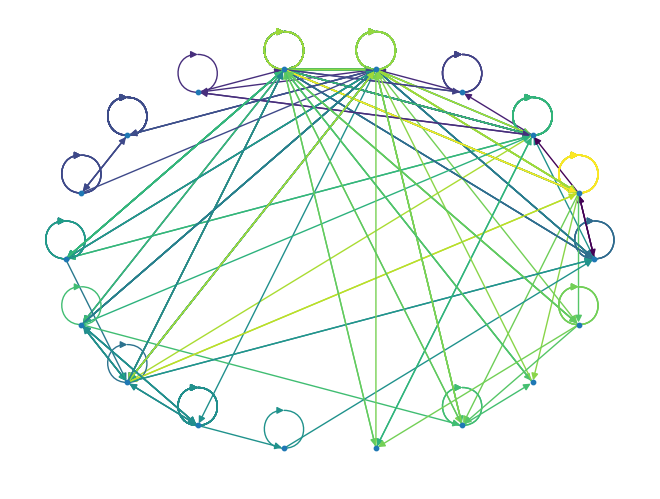

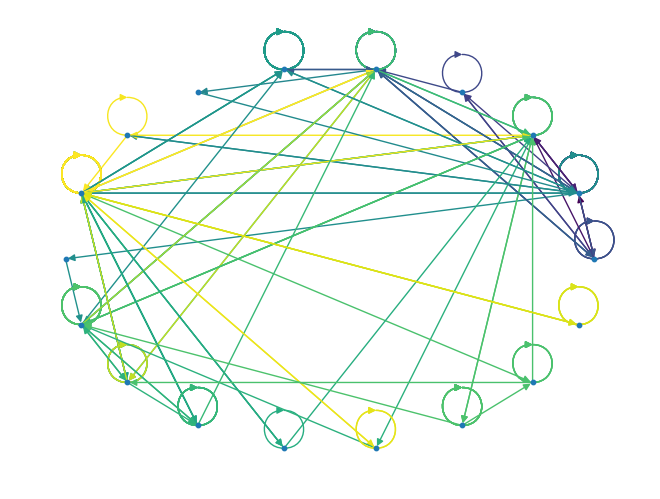

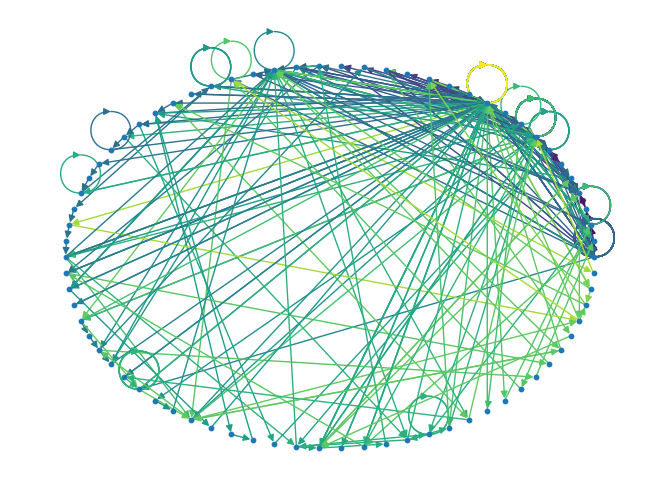

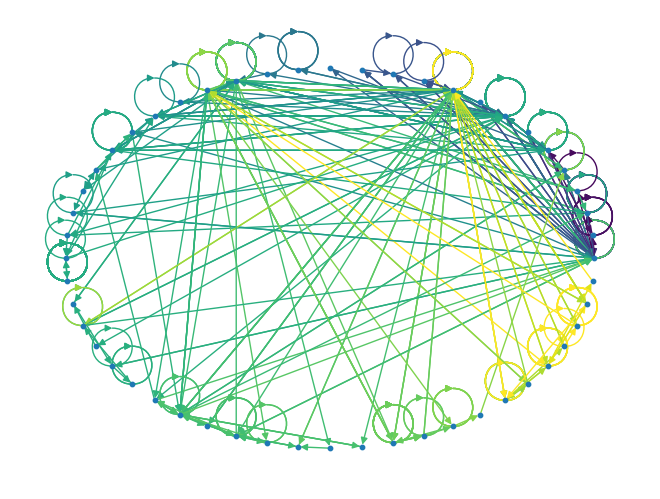

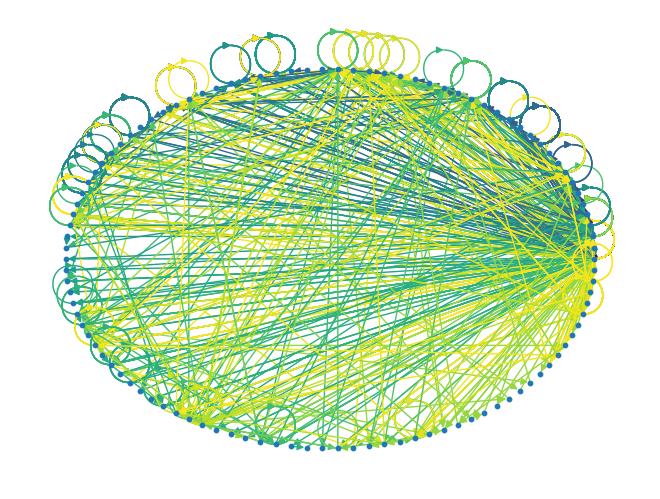

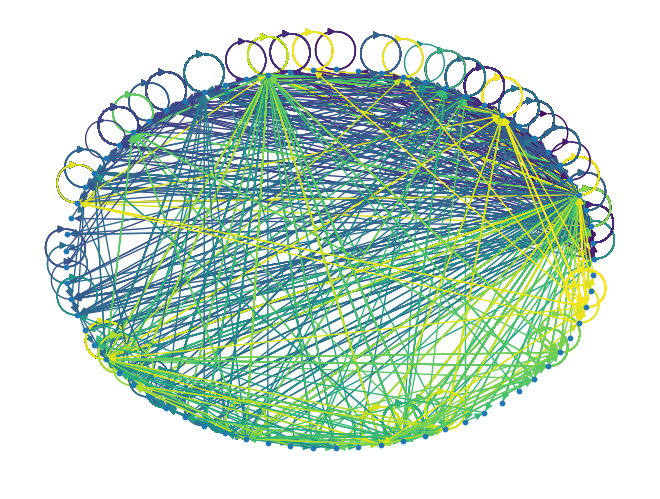

In [253]:
for user in ids:
    trajectory = df[df['userId'] == user]['topics']
    norm = mpl.colors.Normalize(vmin=min(trajectory.index), vmax=max(trajectory.index))
    cmap = cm.viridis
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    categories = np.unique(trajectory)
    edge_colours = m.to_rgba(trajectory.index)
    
    G = nx.MultiDiGraph()
    for i, (u, v) in enumerate(itertools.pairwise(trajectory)):
        G.add_edge(u, v, colour = edge_colours[i + 1])

    nx.draw(G, pos = nx.circular_layout(G), 
            edge_color = list(nx.get_edge_attributes(G, 'colour').values()),
            node_size = 10, connectionstyle="arc3")
    plt.show()

from df to timeseries

In [177]:
import matplotlib as mpl
import matplotlib.cm as cm
   
norm = mpl.colors.Normalize(vmin=min(trajectory.index), vmax=max(trajectory.index))
cmap = cm.viridis
m = cm.ScalarMappable(norm=norm, cmap=cmap)


In [178]:
#plot timeseries
categories = np.unique(bets_users['topics'])
categories
edge_colours = m.to_rgba(trajectory.index)
G = nx.MultiDiGraph()

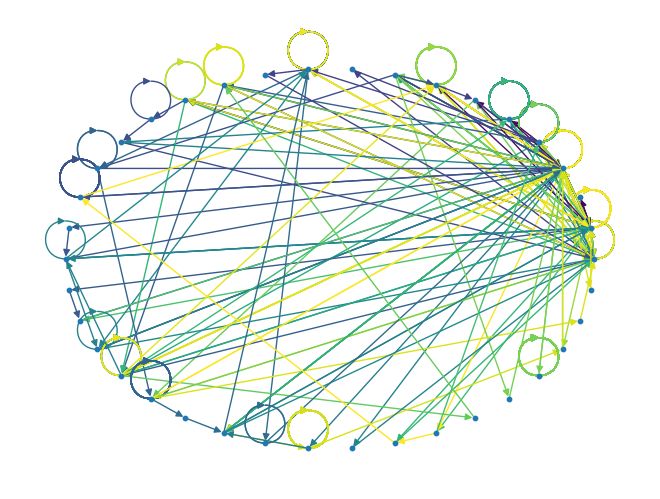

In [179]:
# nx.draw(G, pos=nx.circular_layout(G))
for i, (u, v) in enumerate(itertools.pairwise(trajectory)):
    G.add_edge(u, v, colour = edge_colours[i + 1])

nx.draw(G, pos = nx.circular_layout(G), edge_color = list(nx.get_edge_attributes(G, 'colour').values()), node_size = 10, connectionstyle="arc3")

In [ ]:
def create_temporal_network(userId):
    """
    input: userId that we want to plot
    output: temporal network drawing

    """